In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import tensorflow as tf

In [ ]:
from tensorflow.keras import Sequential

In [ ]:
from tensorflow.keras.layers import Conv2D , MaxPool2D , Flatten, Dense

## Initialize the CNN model

In [ ]:
 cnn_model = Sequential()

### Add convolution layer

In [ ]:
# first layer through which input image(raw) passes is convolution layer
# Add convolution layer
# Activation is important in convolution layer as ex: to avoid negative values as we dont have negative pixels in output
# input_shape -- we have to provide fixed size to every image here . size depends on computational power of system . More the shape more is quality and high will be performance .
# if input_shape high then the time complexity also might increase .
# Also batch size effects all above factors . So we have to be careful while choosing input shape .. otherwise due to sudden large shapes the RAM might collapse and say no memory
# input_shape=(64,64,3) -- as you are working with color image
# filters -- no. of filters

conv_layer = Conv2D(filters = 32 , kernel_size = (3,3),strides=(1,1),padding='valid',activation='relu',input_shape=(64,64,3))

In [ ]:
# convolution layer will not convert images to input_shape given . We have to reshape the images before feeding them to convolution layer

In [ ]:
cnn_model.add(conv_layer)

### Add Max pool layer

In [ ]:
pool_layer = MaxPool2D(pool_size = (2,2),strides = (2,2))

In [ ]:
cnn_model.add(pool_layer)

### Add Flatten layer

In [ ]:
flatten_layer = Flatten()

In [ ]:
cnn_model.add(flatten_layer)

### Add Hidden/Fully Connected layer

In [ ]:
fc_layer = Dense(units=200,kernel_initializer = "random_uniform",activation='relu',bias_initializer = "random_uniform")

In [ ]:
cnn_model.add(fc_layer)

### Add the output layer

In [ ]:
# units=1 as it is binary classification dogs and cats are two classes

op_layer = Dense(units = 1 , activation='sigmoid',kernel_initializer = "random_uniform",bias_initializer = "random_uniform")

In [ ]:
cnn_model.add(op_layer)

In [ ]:
cnn_model.summary()
# None here is batch size

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 31, 31, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 30752)             0         
                                                                 
 dense (Dense)               (None, 200)               6150600   
                                                                 
 dense_1 (Dense)             (None, 1)                 201       
                                                                 
Total params: 6151697 (23.47 MB)
Trainable params: 6151697 (23.47 MB)
Non-trainable params: 0 (0.00 Byte)
________________

In [ ]:
from tensorflow.keras.utils import plot_model

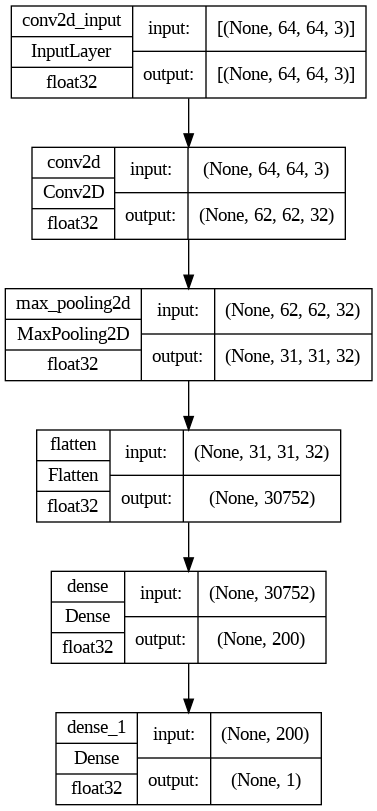

In [ ]:
plot_model(cnn_model , show_shapes = True , show_dtype = True)

### COmpile the model

In [ ]:
from tensorflow.keras.optimizers import Adam

In [ ]:
adam_o = Adam(learning_rate = 0.001)

In [ ]:
# reason to use compile is : to mention all strategies to be followed during back propagation

cnn_model.compile(loss = "binary_crossentropy",optimizer = adam_o ,metrics =['accuracy'])

- Whenever working with images the first step in any company would be "Annotation" -- this term will be used for both image classification and object detection .
- Annotation means specifying the ground truth (GT) which means actual value .
- Most companies has got separate team for annotation

- In keras there is a class called " Image data generator "

In [ ]:
def data():
  for i in range(10):
    yield i

In [ ]:
g = data()
print(next(g))
print(next(g))
print(next(g))

0
1
2


In [ ]:
for j in data():
  print(j,end=' ,')

0 ,1 ,2 ,3 ,4 ,5 ,6 ,7 ,8 ,9 ,

In [ ]:
for i in g :
  print(i)
  if i==4 :
    break
# you are not loading it until you ask generator

3
4


### Image Data Generator

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
import random

In [ ]:
# preprocessing_function .. when you want to provide custom preprocessing on your own pass the function that you have written for the image data preprocess
# shear range -- rotation in counter clockwise
# rescale is must provided

train_gen = ImageDataGenerator(rotation_range = random.randint(0,30),
                               shear_range = random.randint(0,1000)/100 ,
                               zoom_range = [0,1],
                               horizontal_flip=True ,
                               vertical_flip= True ,
                               rescale=1.0/255 )

In [ ]:
# augmentation techniques should not be applied on test data
# only scaling has to be applied

test_gen = ImageDataGenerator(rescale = 1.0/255)

In [ ]:
# till now we created train and test instances for image generator for loading data
# we can load data from a directory or excel

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
folder_path = '/content/drive/MyDrive/training_set'

In [ ]:
import os
files = os.listdir('/content/drive/MyDrive/training_set')
print(files)

['.DS_Store', 'dogs', 'cats']


In [ ]:
train_data = train_gen.flow_from_directory(folder_path,target_size=(64,64),color_mode='rgb',
                                           class_mode = 'binary',batch_size=32,shuffle=True)

Found 8020 images belonging to 2 classes.


In [ ]:
next(train_data)

(array([[[[0.49057811, 0.47580442, 0.48017305],
          [0.5181949 , 0.49584398, 0.49537042],
          [0.46749783, 0.44236597, 0.4524684 ],
          ...,
          [0.9220823 , 0.7738887 , 0.57722473],
          [0.9144033 , 0.749259  , 0.5393949 ],
          [0.90079254, 0.7144877 , 0.51541346]],
 
         [[0.50234216, 0.48776028, 0.48755303],
          [0.53015697, 0.50900966, 0.507681  ],
          [0.47661504, 0.45331976, 0.46477994],
          ...,
          [0.9194992 , 0.7687871 , 0.57458144],
          [0.9115039 , 0.7444189 , 0.5354087 ],
          [0.89669615, 0.7091319 , 0.5099311 ]],
 
         [[0.51416206, 0.49975595, 0.49493298],
          [0.54213494, 0.5221514 , 0.51982427],
          [0.48591548, 0.46445683, 0.47726673],
          ...,
          [0.9168912 , 0.7638945 , 0.5715727 ],
          [0.90799576, 0.73916566, 0.53131634],
          [0.8926874 , 0.7038319 , 0.5045603 ]],
 
         ...,
 
         [[0.738746  , 0.6900116 , 0.6572902 ],
          [0.83895

In [ ]:
next(train_data)[0].shape

(32, 64, 64, 3)

In [ ]:
test_folder_path = '/content/drive/MyDrive/test_set'

In [ ]:
test_data = test_gen.flow_from_directory(test_folder_path,target_size=(64,64),
                                         color_mode = 'rgb',class_mode='binary',
                                         batch_size=32,shuffle=False)

Found 2000 images belonging to 2 classes.


In [ ]:
train_data.class_indices

{'cats': 0, 'dogs': 1}

In [ ]:
next(train_data)[0].shape # X of first 32 batch

(32, 64, 64, 3)

In [ ]:
next(train_data)[1].shape  # y of first 32 batch

(32,)

In [ ]:
next(train_data)[0][0].size     # first image size

12288

In [ ]:
64*64*3

12288

In [ ]:
8000/32

250.0

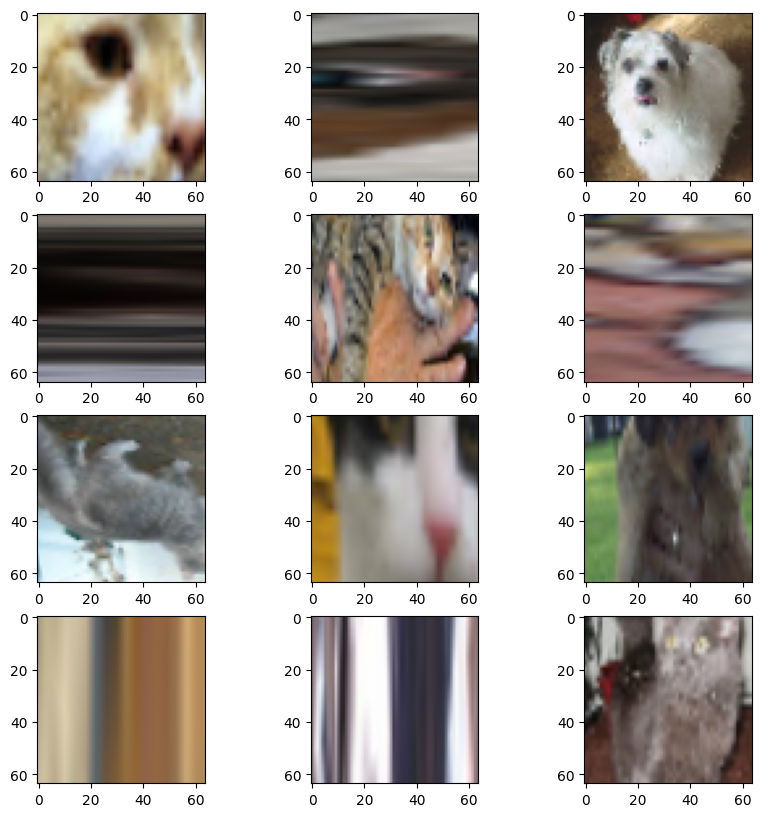

In [ ]:
plt.figure(figsize = (10,10))
for idx,each_batch in enumerate(train_data,1):  # starting idx from 1
  img = each_batch[0][0]
  plt.subplot(4,3,idx) # here considering idx as position
  plt.imshow(img)
  if idx >= 12:
    break

In [ ]:
cnn_model.fit(train_data,epochs=15,validation_data=test_data)

Epoch 1/15
251/251 [==============================] - 1524s 6s/step - loss: 0.7017 - accuracy: 0.5308 - val_loss: 0.6769 - val_accuracy: 0.5745
Epoch 2/15
251/251 [==============================] - 75s 300ms/step - loss: 0.6813 - accuracy: 0.5702 - val_loss: 0.6552 - val_accuracy: 0.6270
Epoch 3/15
251/251 [==============================] - 73s 291ms/step - loss: 0.6773 - accuracy: 0.5813 - val_loss: 0.6570 - val_accuracy: 0.6135
Epoch 4/15
251/251 [==============================] - 70s 280ms/step - loss: 0.6696 - accuracy: 0.5898 - val_loss: 0.6409 - val_accuracy: 0.6480
Epoch 5/15
251/251 [==============================] - 70s 278ms/step - loss: 0.6592 - accuracy: 0.6084 - val_loss: 0.7142 - val_accuracy: 0.5540
Epoch 6/15
251/251 [==============================] - 70s 278ms/step - loss: 0.6585 - accuracy: 0.6076 - val_loss: 0.6829 - val_accuracy: 0.5645
Epoch 7/15
251/251 [==============================] - 71s 282ms/step - loss: 0.6492 - accuracy: 0.6251 - val_loss: 0.6282 - val_acc

In [ ]:
cnn_model.save("cnn_cd.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
